In [78]:
# Import dependencies - run this first
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rampy as rp
import scipy
from scipy.integrate import simps
from numpy import trapz
from scipy.signal import find_peaks

Imax:  149.3641
peak_index (array([59017, 59022, 59023]),)
x peak 2.960117
the first index max happen:  59017
Mean baseline current:  -1.905168720452
Peak Current:  149.3641
Area:  16.03194539737906
Pulse Time:  418.84999999999997 milliseconds
Final current:  9.502358720452001
[ 9.88447972 11.41296472 10.64872172 ...  8.35599572  9.88447972
  9.88447972]
Number of local maxima:  3


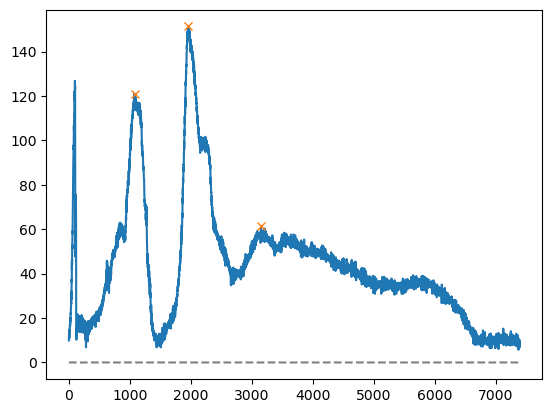

In [79]:
# Extract Metrics
# each file has 4 columns of numbers: a=time, b=current, c=noise, d=+/-b
# dt = a[i+1] - a[i] = 5.0e-05 (S)
filename = '001.txt'
a, b, c, d = np.loadtxt(filename, unpack=True)
Imax = max(b)
print ('Imax: ', Imax)
# X position
peak_index = np.where(b==Imax)
print ('peak_index', peak_index)
# throw away extra 
peak_index = peak_index[0]
# grab the first position
x_peak = a[peak_index[0]]
print('x peak', x_peak)
peak_index = int(peak_index[0])
print ('the first index max happen: ', peak_index)

# Define noise
if x_peak > 0.5: 
    mean = np.mean(b[range(0, 10000)])
    noise = np.std(b[range(0, 10000)])
else: 
    mean = np.mean(b[range(50000, 60000)])
    noise = np.std(b[range(50000, 60000)])
    
print('Mean baseline current: ', mean)
b = np.subtract(b, mean)
# Define discharge region
discharge_index = []
for i in range(peak_index-10000, peak_index+20000):
    while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
        if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
            discharge_index = np.append(discharge_index, i)
        break

discharge_index = np.asfarray(discharge_index)
discharge_index = discharge_index.astype(int)
# print(discharge_index)
discharge_time = a[discharge_index]
discharge_current = b[discharge_index]

print("Peak Current: ", Imax)
# Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
area = trapz(discharge_current, dx=0.00005)
area_simps = simps(discharge_current, dx=0.00005)
print("Area: ", area)

# Calculate discharge time
pulseTime = max(discharge_time) - min(discharge_time)
print("Pulse Time: ", pulseTime*1000, 'milliseconds')

# Catch end current
I_Final = discharge_current[len(discharge_current)-70]
print('Final current: ', I_Final)

from scipy.signal import find_peaks

print(discharge_current)
x = discharge_current
peaks, _ = find_peaks(x, height=0, distance=100, width=50)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.savefig('1oextracted.png', dpi=100)
# Find number of peaks
peak_count = len(peaks)
print("Number of local maxima: ", peak_count)

Imax:  149.3641
peak_index (array([59017, 59022, 59023]),)
x peak 2.960117
the first index max happen:  59017
Mean baseline current:  -1.905168720452
Peak Current:  149.3641
Area:  16.03194539737906
Area_simps:  16.029175018612392
Pulse Time:  418.84999999999997 milliseconds
I_final position  6653
Final current:  12.941448720452
Number of local maxima:  3


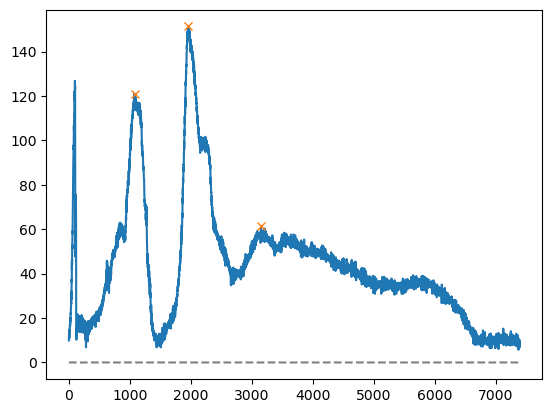

In [80]:
# Extract Metrics
# each file has 4 columns of numbers: a=time, b=current, c=noise, d=+/-b
# dt = a[i+1] - a[i] = 5.0e-05 (S)
filenames = ['001.txt']

for filename in filenames:
    a, b, c, d = np.loadtxt(filename, unpack=True)
    Imax = max(b)
    print ('Imax: ', Imax)
    # X position
    peak_index = np.where(b==Imax)
    print ('peak_index', peak_index)
    # throw away extra 
    peak_index = peak_index[0]
    # grab the first position
    x_peak = a[peak_index[0]]
    print('x peak', x_peak)
    peak_index = int(peak_index[0])
    print ('the first index max happen: ', peak_index)

    # Define noise
    if x_peak > 0.5: 
        mean = np.mean(b[range(0, 10000)])
        noise = np.std(b[range(0, 10000)])
    else: 
        mean = np.mean(b[range(50000, 60000)])
        noise = np.std(b[range(50000, 60000)])
    
    print('Mean baseline current: ', mean)
    b = np.subtract(b, mean)
    # Define discharge region
    discharge_index = []
    for i in range(peak_index-10000, peak_index+20000):
        while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
            if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
                discharge_index = np.append(discharge_index, i)
            break

    discharge_index = np.asfarray(discharge_index)
    discharge_index = discharge_index.astype(int)
    # print(discharge_index)
    discharge_time = a[discharge_index]
    discharge_current = b[discharge_index]

    print("Peak Current: ", Imax)
    # Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
    area = trapz(discharge_current, dx=0.00005)
    area_simps = simps(discharge_current, dx=0.00005)
    print("Area: ", area)
    print("Area_simps: ", area_simps)

    # Calculate discharge time
    pulseTime = max(discharge_time) - min(discharge_time)
    print("Pulse Time: ", pulseTime*1000, 'milliseconds')

    # Catch end current
    I_Final = discharge_current[int (0.9*len(discharge_current))]
    print ('I_final position ', int (0.9*len(discharge_current)))
    print('Final current: ', I_Final)
    #print(discharge_current)
    x = discharge_current
    peaks, _ = find_peaks(x, height=0, distance=100, width=50)
    
    # Find number of peaks
    peak_count = len(peaks)
    print("Number of local maxima: ", peak_count)
    
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")
    plt.plot(np.zeros_like(x), "--", color="gray")
    plt.show()


Text(0, 0.5, 'Current (A)')

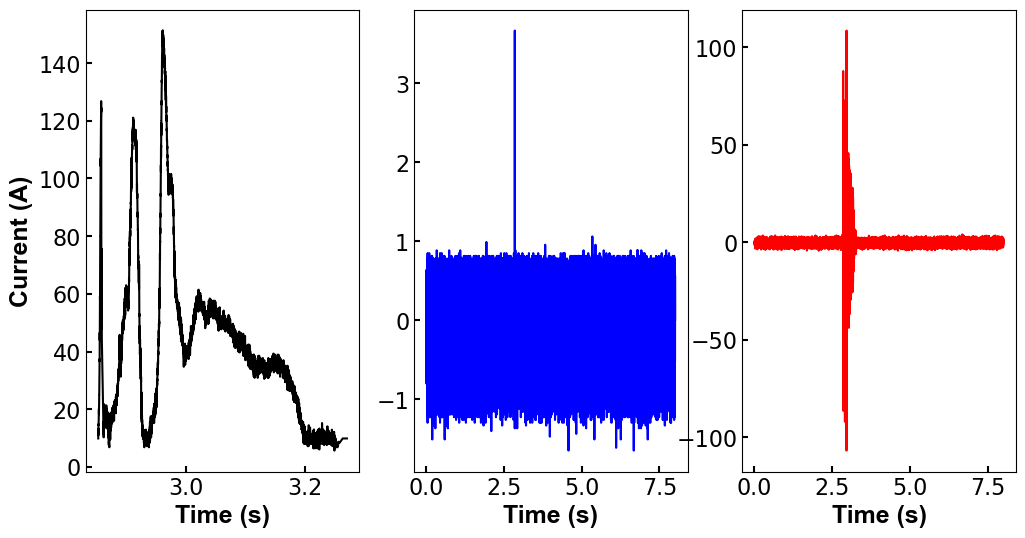

In [81]:
# Plot a single Raman spectrum

# Plot style
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=[12,6])
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax1.set_xlim(4, 6)
ax2.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax2.set_xlim(4, 6)
ax3.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax3.set_xlim(4, 6)

# Plot
#ax1.plot(a, b, color='red')
ax1.plot(discharge_time, discharge_current, color='black')
ax2.plot(a, c, color='blue')
ax3.plot(a, d, color='red')

ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax2.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax3.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax1.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

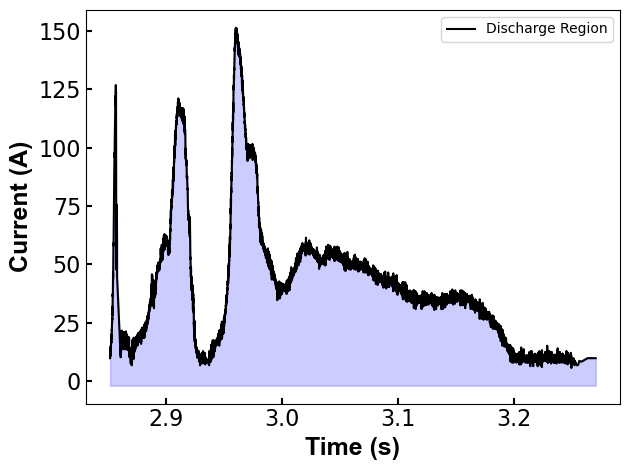

In [82]:
# Plot a single Raman spectrum

filename = '001.txt'
a, b, c, d = np.loadtxt(filename, unpack=True)

# Plot style
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
#ax.set_xlim(3, 4)

# Plot
#ax.plot(a, b, color='blue', label='Raw Data')
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
#ax.plot(discharge_time[peaks], x[peaks], marker='x', markersize=10, color='orange', label='Local Maxima', linestyle='none')
ax.fill_between(x=discharge_time, y1=discharge_current, y2=mean, color='blue', alpha=0.2)
ax.legend()

ax.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

# Format and save
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=300) # Change file name
plt.show()

In [83]:
mean

-1.905168720452

In [84]:
# Snatch all text files in current directory
import os             
all_files = os.listdir()   # imagine you're one directory above test dir
# print(all_files)  # won't necessarily be sorted
import glob
txt_files = glob.glob("./*.txt")
print(txt_files)
print(len(txt_files))

['./001.txt']
1


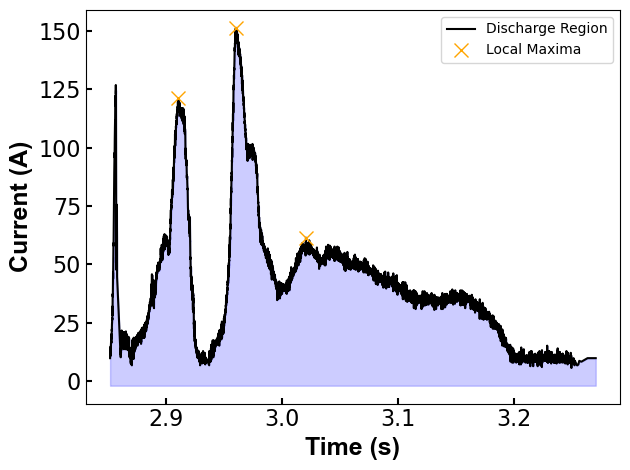

In [85]:
# Plot a single Raman spectrum

filename = txt_files[0]
a, b, c, d = np.loadtxt(filename, unpack=True)

# Plot style
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
#ax.set_xlim(3, 4)

# Plot
#ax.plot(a, b, color='blue', label='Raw Data')
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
ax.plot(discharge_time[peaks], x[peaks], marker='x', markersize=10, color='orange', label='Local Maxima', linestyle='none')
ax.fill_between(x=discharge_time, y1=discharge_current, y2=mean, color='blue', alpha=0.2)
ax.legend()

ax.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

# Format and save
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=300) # Change file name
plt.show()

In [86]:
def process_ITcurve(filename):
    print(filename)
    # Extract metrics
    a, b, c, d = np.loadtxt(filename, unpack=True)
    
    # Define maximum
    Imax = max(b)
    # X position
    peak_index = np.where(b==Imax) # Find index of max
    peak_index = peak_index[0]
    x_peak = a[peak_index[0]]
    peak_index = int(peak_index[0])
    
    # Define noise
    if x_peak > 0.5: 
        mean = np.mean(b[range(0, 10000)])
        noise = np.std(b[range(0, 10000)])
    else: 
        mean = np.mean(b[range(50000, 60000)])
        noise = np.std(b[range(50000, 60000)])
    
    # Subtract the baseline current
    b = np.subtract(b, mean)
        
    # Define discharge region
    discharge_index = []
    for i in range(peak_index-10000, peak_index+20000):
        while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
            if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
                discharge_index = np.append(discharge_index, i)
            break
    discharge_index = np.asfarray(discharge_index)
    discharge_index = discharge_index.astype(int)
    discharge_time = a[discharge_index]
    discharge_current = b[discharge_index]
    # Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
    area = trapz(discharge_current, dx=0.00005)
    # area_simps = simps(discharge_current, dx=0.00005)
    # print("Area: ", area)
    # print(area_simps)
    
    # Calculate discharge time
    pulseTime = max(discharge_time) - min(discharge_time)
    # print("Pulse Time: ", pulseTime)
    
    # Catch end current
    I_Final = discharge_current[len(discharge_current)-70]

    from scipy.signal import find_peaks

    x = discharge_current
    peaks, _ = find_peaks(x, height=0, distance=100, width=50)
    # Find number of peaks
    peak_count = len(peaks)

    # Assimilate
    current_stats = [Imax, np.mean(discharge_current), area, pulseTime, I_Final, peak_count]
    return current_stats

In [87]:
# Pull text files, assemble into statistics
big_stats = np.asarray([])

for i in range(0, len(txt_files)):
    filename = txt_files[i]
    stats = process_ITcurve(filename)
    stats = np.append(filename, stats)
    #print(stats)
    if len(big_stats) == 0:
        big_stats = np.append(big_stats, stats)
    else:
        big_stats = np.vstack((big_stats, stats))
#print(big_stats)
#print ("Imax={}, I_mean={}, Current Density (CD)={}, pulseTime={}, I_Final=, peak_count={}".format (big_stats[0]))
properties = ['Imax', 'I_mean', 'Current_Density_CD', 'pulseTime', 'I_Final', 'peak_count']
for i, prop in enumerate (properties):
    print ("{} = {}".format (prop, big_stats[i+1]))

./001.txt
Imax = 149.3641
I_mean = 43.37194541151111
Current_Density_CD = 16.03194539737906
pulseTime = 0.41884999999999994
I_Final = 9.502358720452001
peak_count = 3.0
